In [1]:
from skimage import color, feature
from skimage.feature import hog
from skimage.io import imread
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load

Image :  (450, 488, 3)


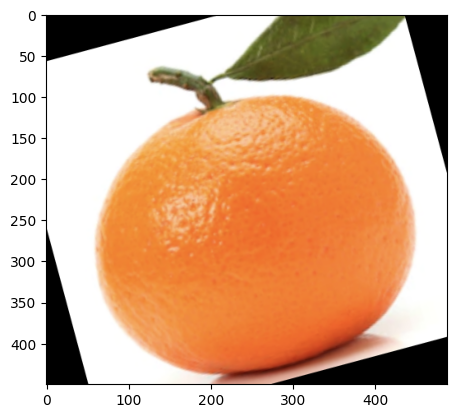

In [4]:
img=np.array(mpimg.imread('dataset\\test\\freshoranges\\rotated_by_15_Screen Shot 2018-06-12 at 11.50.41 PM.png'))
img.setflags(write=1)
print('Image : ',img.shape)
plt.imshow(img)
plt.show()


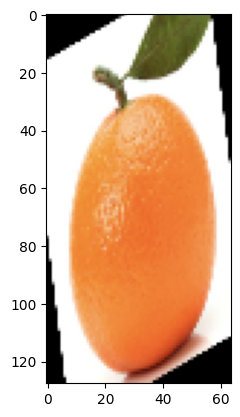

(128, 64, 3)


In [5]:
resized_img=cv2.resize(img,(64,128))
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

(3780,)
[0. 0. 0. ... 0. 0. 0.]
(128, 64)


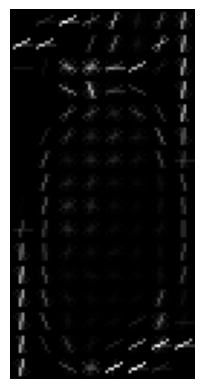

In [6]:
from skimage import color, feature

rgb_img = resized_img[:, :, :3]

gray_img = color.rgb2gray(rgb_img)

fd, hog_image = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True)

print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [11]:
data_freshapples= []
for entry in glob.glob("C:\\Users\\sahil\\Desktop\\majorProject\\KNN\\dataset\\train\\freshapples\\*.png"):
    img = cv2.imread(entry)
    resized_img = cv2.resize(img, (64, 32))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img)
    data_freshapples.append(fd)
print(len(data_freshapples))

data_freshbanana= []
for entry in glob.glob("C:\\Users\\sahil\\Desktop\\majorProject\\KNN\\dataset\\train\\freshbanana\\*.png"):
    img = cv2.imread(entry)
    resized_img = cv2.resize(img, (64, 32))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img)
    data_freshbanana.append(fd)
print(len(data_freshbanana)) 

data_freshoranges= []
for entry in glob.glob("C:\\Users\\sahil\\Desktop\\majorProject\\KNN\\dataset\\train\\freshoranges\\*.png"):
    img = cv2.imread(entry)
    resized_img = cv2.resize(img, (64, 32))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img)
    data_freshoranges.append(fd)
print(len(data_freshoranges))

1693
1581
1466


In [12]:
train_data = data_freshapples+data_freshbanana+data_freshoranges
print(len(train_data))

4740


In [16]:
train_label_list=[]
for i in range(len(train_data)):
    if i< 1693 :
        train_label_list.append('freshapple')
    elif i>1693 and i<3274 :
        train_label_list.append('freshbanana')
    else :
        train_label_list.append('freshorange')
#print(train_label_list)
print(len(train_label_list))

4740


In [2]:
test_freshbanana= []
for entry in glob.glob("C:\\Users\\sahil\\Desktop\\majorProject\\KNN\\dataset\\test\\freshbanana\\*.png"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64, 32))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img)
    test_dict={'data':fd,'label':'freshbanana'}
    test_freshbanana.append(test_dict)
print(len(test_freshbanana))

test_freshoranges= []
for entry in glob.glob("C:\\Users\\sahil\\Desktop\\majorProject\\KNN\\dataset\\test\\freshoranges\\*.png"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64, 32))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img)
    test_dict={'data':fd,'label':'freshoranges'}
    test_freshoranges.append(test_dict)
print(len(test_freshoranges))

test_freshapples= []
for entry in glob.glob("C:\\Users\\sahil\\Desktop\\majorProject\\KNN\\dataset\\test\\freshapples\\*.png"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64, 32))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray_img)
    test_dict={'data':fd,'label':'freshapple'}
    test_freshapples.append(test_dict)
print(len(test_freshapples))

test_data=test_freshapples+test_freshbanana+test_freshoranges
print(len(test_data))

381
388
395
1164


In [5]:
test_features=[]
test_labels=[]
for i in test_data:
    test_labels.append(i['label'])
    test_features.append(i['data'])
print(len(test_features))


1164


In [17]:
import warnings
warnings.filterwarnings('ignore')

x_axis_k_points=[]


f1_euclidean=[]
accuracies_euclidean=[]
conf_matrix_euclidean=[]
for k in range(7):
    knn_euclidean= KNeighborsClassifier(n_neighbors=k+1)
    knn_euclidean.fit(train_data,train_label_list)
    
 
    pred_labels_euclidean=knn_euclidean.predict(test_features)
    

    acc=knn_euclidean.score(test_features,test_labels)
    accuracies_euclidean.append(acc)
    

    conf_matrix_euclidean.append(metrics.confusion_matrix(test_labels,pred_labels_euclidean))
    

    f1_euclidean.append(metrics.f1_score(test_labels,pred_labels_euclidean,pos_label='freshapple',average='micro'))
    
    x_axis_k_points.append(k+1)

In [18]:
for i in range(len(f1_euclidean)):
    print('For k=',i+1,',F1 Score',f1_euclidean[i],' Accuracy : ',accuracies_euclidean[i],' Confusion Matrix : ',conf_matrix_euclidean[i])

For k= 1 ,F1 Score 0.6383161512027491  Accuracy :  0.6383161512027491  Confusion Matrix :  [[369   0  26   0]
 [  5 374   2   0]
 [  0   0   0   0]
 [ 39   2 347   0]]
For k= 2 ,F1 Score 0.6512027491408935  Accuracy :  0.6512027491408935  Confusion Matrix :  [[386   0   9   0]
 [  9 372   0   0]
 [  0   0   0   0]
 [ 81   6 301   0]]
For k= 3 ,F1 Score 0.6245704467353952  Accuracy :  0.6245704467353952  Confusion Matrix :  [[355   1  39   0]
 [  4 372   5   0]
 [  0   0   0   0]
 [ 50   3 335   0]]
For k= 4 ,F1 Score 0.6426116838487973  Accuracy :  0.6426116838487973  Confusion Matrix :  [[373   1  21   0]
 [  4 375   2   0]
 [  0   0   0   0]
 [ 80   5 303   0]]
For k= 5 ,F1 Score 0.6237113402061856  Accuracy :  0.6237113402061856  Confusion Matrix :  [[357   1  37   0]
 [  7 369   5   0]
 [  0   0   0   0]
 [ 51   4 333   0]]
For k= 6 ,F1 Score 0.6323024054982818  Accuracy :  0.6323024054982818  Confusion Matrix :  [[368   1  26   0]
 [  7 368   6   0]
 [  0   0   0   0]
 [ 71   6 31

In [19]:
#list of metrics
x_axis_k_points_m=[]
f1_manhattan=[]
accuracies_manhattan=[]
conf_matrix_manhattan=[]
for k in range(7):
    knn_manhattan= KNeighborsClassifier(n_neighbors=k+1,p=1)
    knn_manhattan.fit(train_data,train_label_list)
    
    #prediction
    pred_labels_manhattan=knn_manhattan.predict(test_features)
    
    #accuracy
    acc=knn_manhattan.score(test_features,test_labels)
    accuracies_manhattan.append(acc)
    
    #confusion matrix
    conf_matrix_manhattan.append(metrics.confusion_matrix(test_labels,pred_labels_manhattan))
    
    #f1 score of prediction
    f1_manhattan.append(metrics.f1_score(test_labels,pred_labels_manhattan,pos_label='freshapple',average='micro'))
    
    x_axis_k_points_m.append(k+1)

In [20]:
for i in range(len(f1_manhattan)):
    print('For k=',i+1,',F1 Score',f1_manhattan[i],' Accuracy : ',accuracies_manhattan[i],' Confusion Matrix : ',conf_matrix_manhattan[i])

For k= 1 ,F1 Score 0.647766323024055  Accuracy :  0.647766323024055  Confusion Matrix :  [[373   0  22   0]
 [  0 381   0   0]
 [  0   0   0   0]
 [ 17   1 370   0]]
For k= 2 ,F1 Score 0.6554982817869416  Accuracy :  0.6554982817869416  Confusion Matrix :  [[385   0  10   0]
 [  3 378   0   0]
 [  0   0   0   0]
 [ 59   2 327   0]]
For k= 3 ,F1 Score 0.6348797250859106  Accuracy :  0.6348797250859106  Confusion Matrix :  [[362   0  33   0]
 [  1 377   3   0]
 [  0   0   0   0]
 [ 28   2 358   0]]
For k= 4 ,F1 Score 0.647766323024055  Accuracy :  0.647766323024055  Confusion Matrix :  [[378   0  17   0]
 [  3 376   2   0]
 [  0   0   0   0]
 [ 60   4 324   0]]
For k= 5 ,F1 Score 0.6323024054982818  Accuracy :  0.6323024054982818  Confusion Matrix :  [[359   1  35   0]
 [  3 377   1   0]
 [  0   0   0   0]
 [ 46   3 339   0]]
For k= 6 ,F1 Score 0.6365979381443299  Accuracy :  0.6365979381443299  Confusion Matrix :  [[367   1  27   0]
 [  4 374   3   0]
 [  0   0   0   0]
 [ 59   7 322   

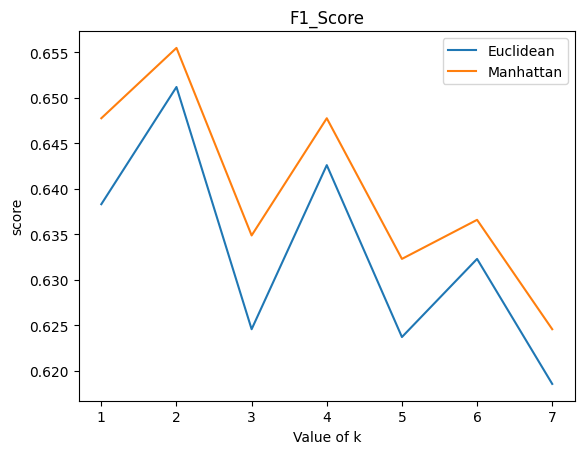

In [21]:
plt.plot(x_axis_k_points,f1_euclidean,label='Euclidean')
plt.plot(x_axis_k_points_m,f1_manhattan,label='Manhattan')
plt.title("F1_Score")
plt.xlabel("Value of k")
plt.ylabel("score")
plt.legend()
plt.show()

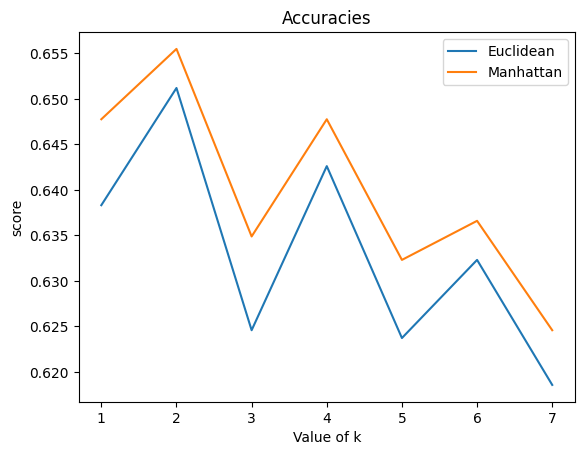

In [22]:
plt.plot(x_axis_k_points,accuracies_euclidean,label='Euclidean')
plt.plot(x_axis_k_points_m,accuracies_manhattan,label='Manhattan')
plt.title("Accuracies")
plt.xlabel("Value of k")
plt.ylabel("score")
plt.legend()
plt.show()

In [24]:
from joblib import dump

# Assuming knn is your trained model
dump(knn_manhattan, 'knn_manhattan.joblib')
dump(knn_euclidean, 'knn_euclidean.joblib')



['knn_euclidean.joblib']

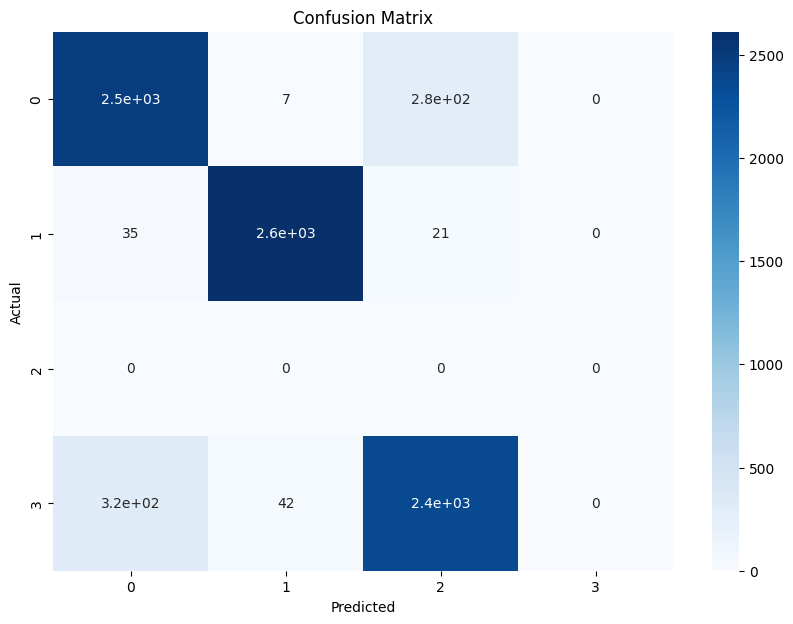

In [10]:

knn_manhattan = load('knn_manhattan.joblib')

conf_matrix_manhattan=[]

for k in range(7):
    
  
    pred_labels_manhattan=knn_manhattan.predict(test_features)
    
   
    conf_matrix_manhattan.append(metrics.confusion_matrix(test_labels,pred_labels_manhattan))


combined_conf_mat = np.sum(conf_matrix_manhattan, axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(combined_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



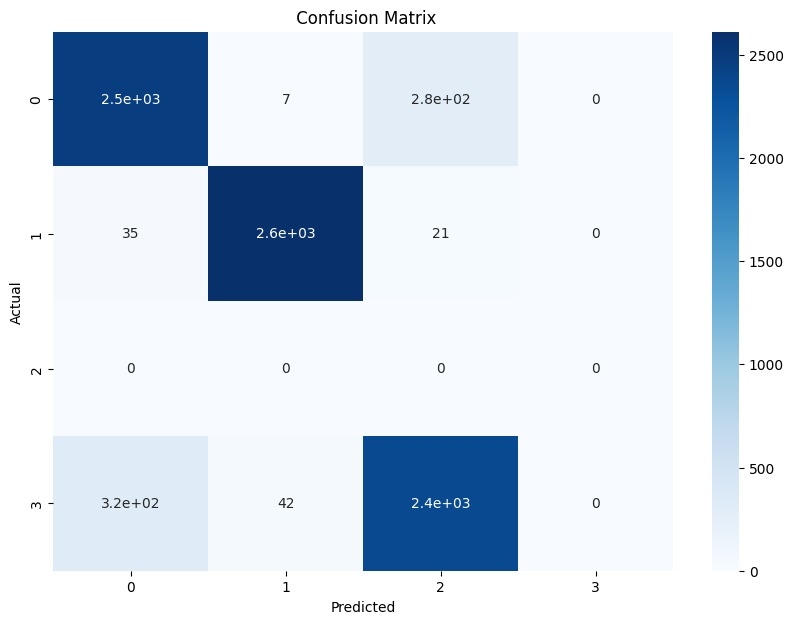

In [11]:
knn_euclidean = load('knn_manhattan.joblib')

conf_matrix_euclidean=[]

for k in range(7):
    
  
    pred_labels_euclidean=knn_euclidean.predict(test_features)
    
   
    conf_matrix_euclidean.append(metrics.confusion_matrix(test_labels,pred_labels_manhattan))


combined_conf_mat = np.sum(conf_matrix_euclidean, axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(combined_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' Confusion Matrix')
plt.show()